In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
filename = '../data/machine_learning_mastery/pima-indians-diabetes.csv'
raw_data = open(filename, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
print(data.shape)

(768, 9)


In [4]:
# Load CSV using Numpy
data = np.loadtxt(raw_data, delimiter = ",")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: loadtxt: Empty input file: "<_io.TextIOWrapper name='../data/machine_learning_mastery/pima-indians-diabetes.csv' mode='rt' encoding='UTF-8'>"
  


In [5]:
# Load CSV from ULR using Numpy
from urllib.request import urlopen
url = "https://goo.gl/bDdbiA"
raw_data = urlopen(url)
dataset = loadtxt(raw_data, delimiter=",")
print(dataset.shape)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)>

In [5]:
# Load CSV uisng Pandas
filename = '../data/machine_learning_mastery/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Load CSV using Pandas from URL
url = "https://goo.gl/bDdbiA"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(url, names = names)

In [6]:
# Data Types for Each Attribute
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
print(description)

          preg     plas     pres     skin     test     mass     pedi      age    class
count  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000  768.000
mean     3.845  120.895   69.105   20.536   79.799   31.993    0.472   33.241    0.349
std      3.370   31.973   19.356   15.952  115.244    7.884    0.331   11.760    0.477
min      0.000    0.000    0.000    0.000    0.000    0.000    0.078   21.000    0.000
25%      1.000   99.000   62.000    0.000    0.000   27.300    0.244   24.000    0.000
50%      3.000  117.000   72.000   23.000   30.500   32.000    0.372   29.000    0.000
75%      6.000  140.250   80.000   32.000  127.250   36.600    0.626   41.000    1.000
max     17.000  199.000  122.000   99.000  846.000   67.100    2.420   81.000    1.000


In [9]:
# Class Distribution
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


In [10]:
# Pairwise Pearson correlations
correlations = data.corr(method = 'pearson')
print(correlations)

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


In [11]:
# Skew for each attributes
skew = data.skew()
print(skew)

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


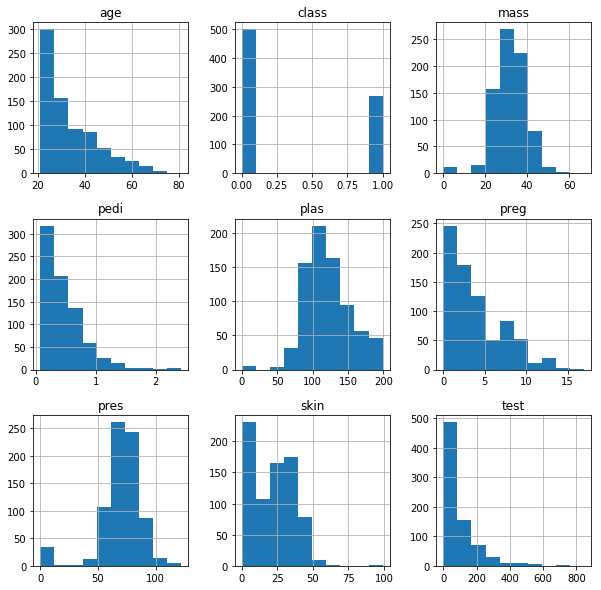

In [9]:
# Univariate Histograms
data.hist(figsize=(10,10))
plt.show()

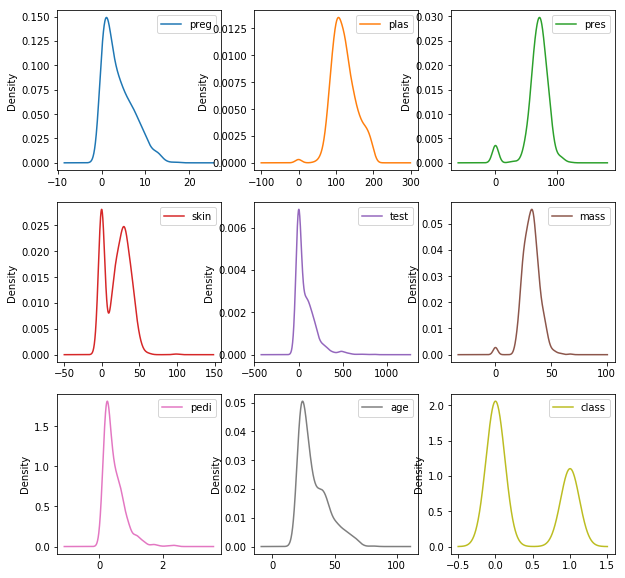

In [12]:
# Univariate Density Plots
data.plot(kind = 'density', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))
plt.show()

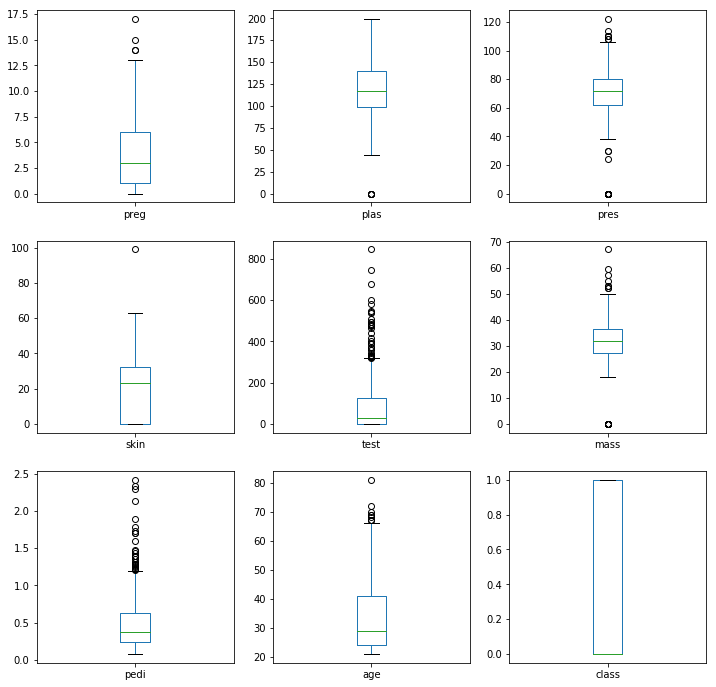

In [15]:
# box and Whisker Plots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

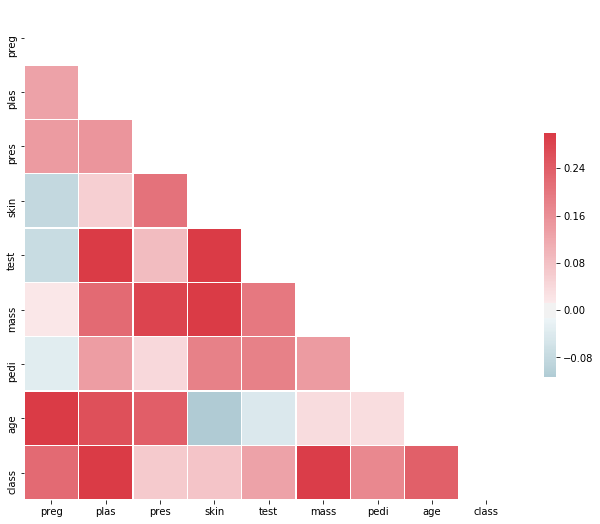

In [25]:
# Correlation Matrix Plot
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot correlation matrix

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

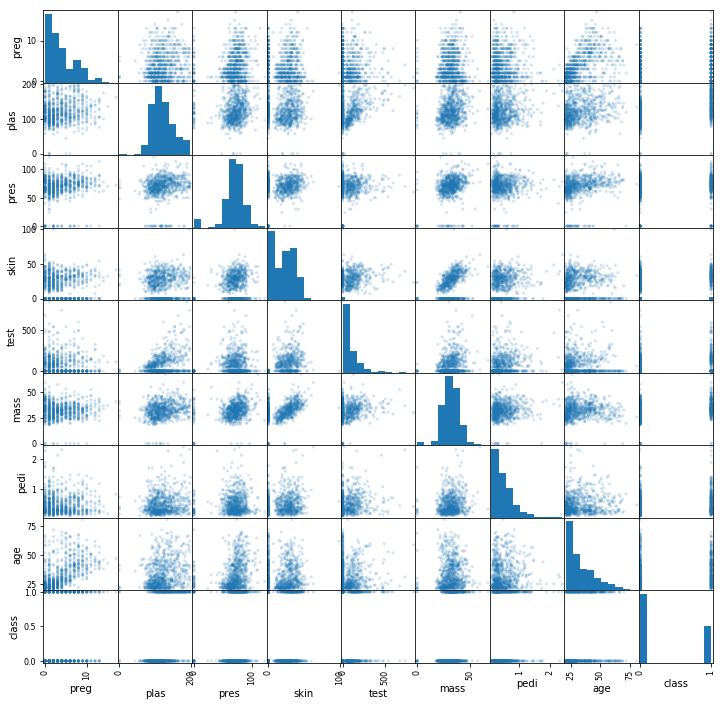

In [28]:
# Scatterplot Matrix
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(12,12))
plt.show()

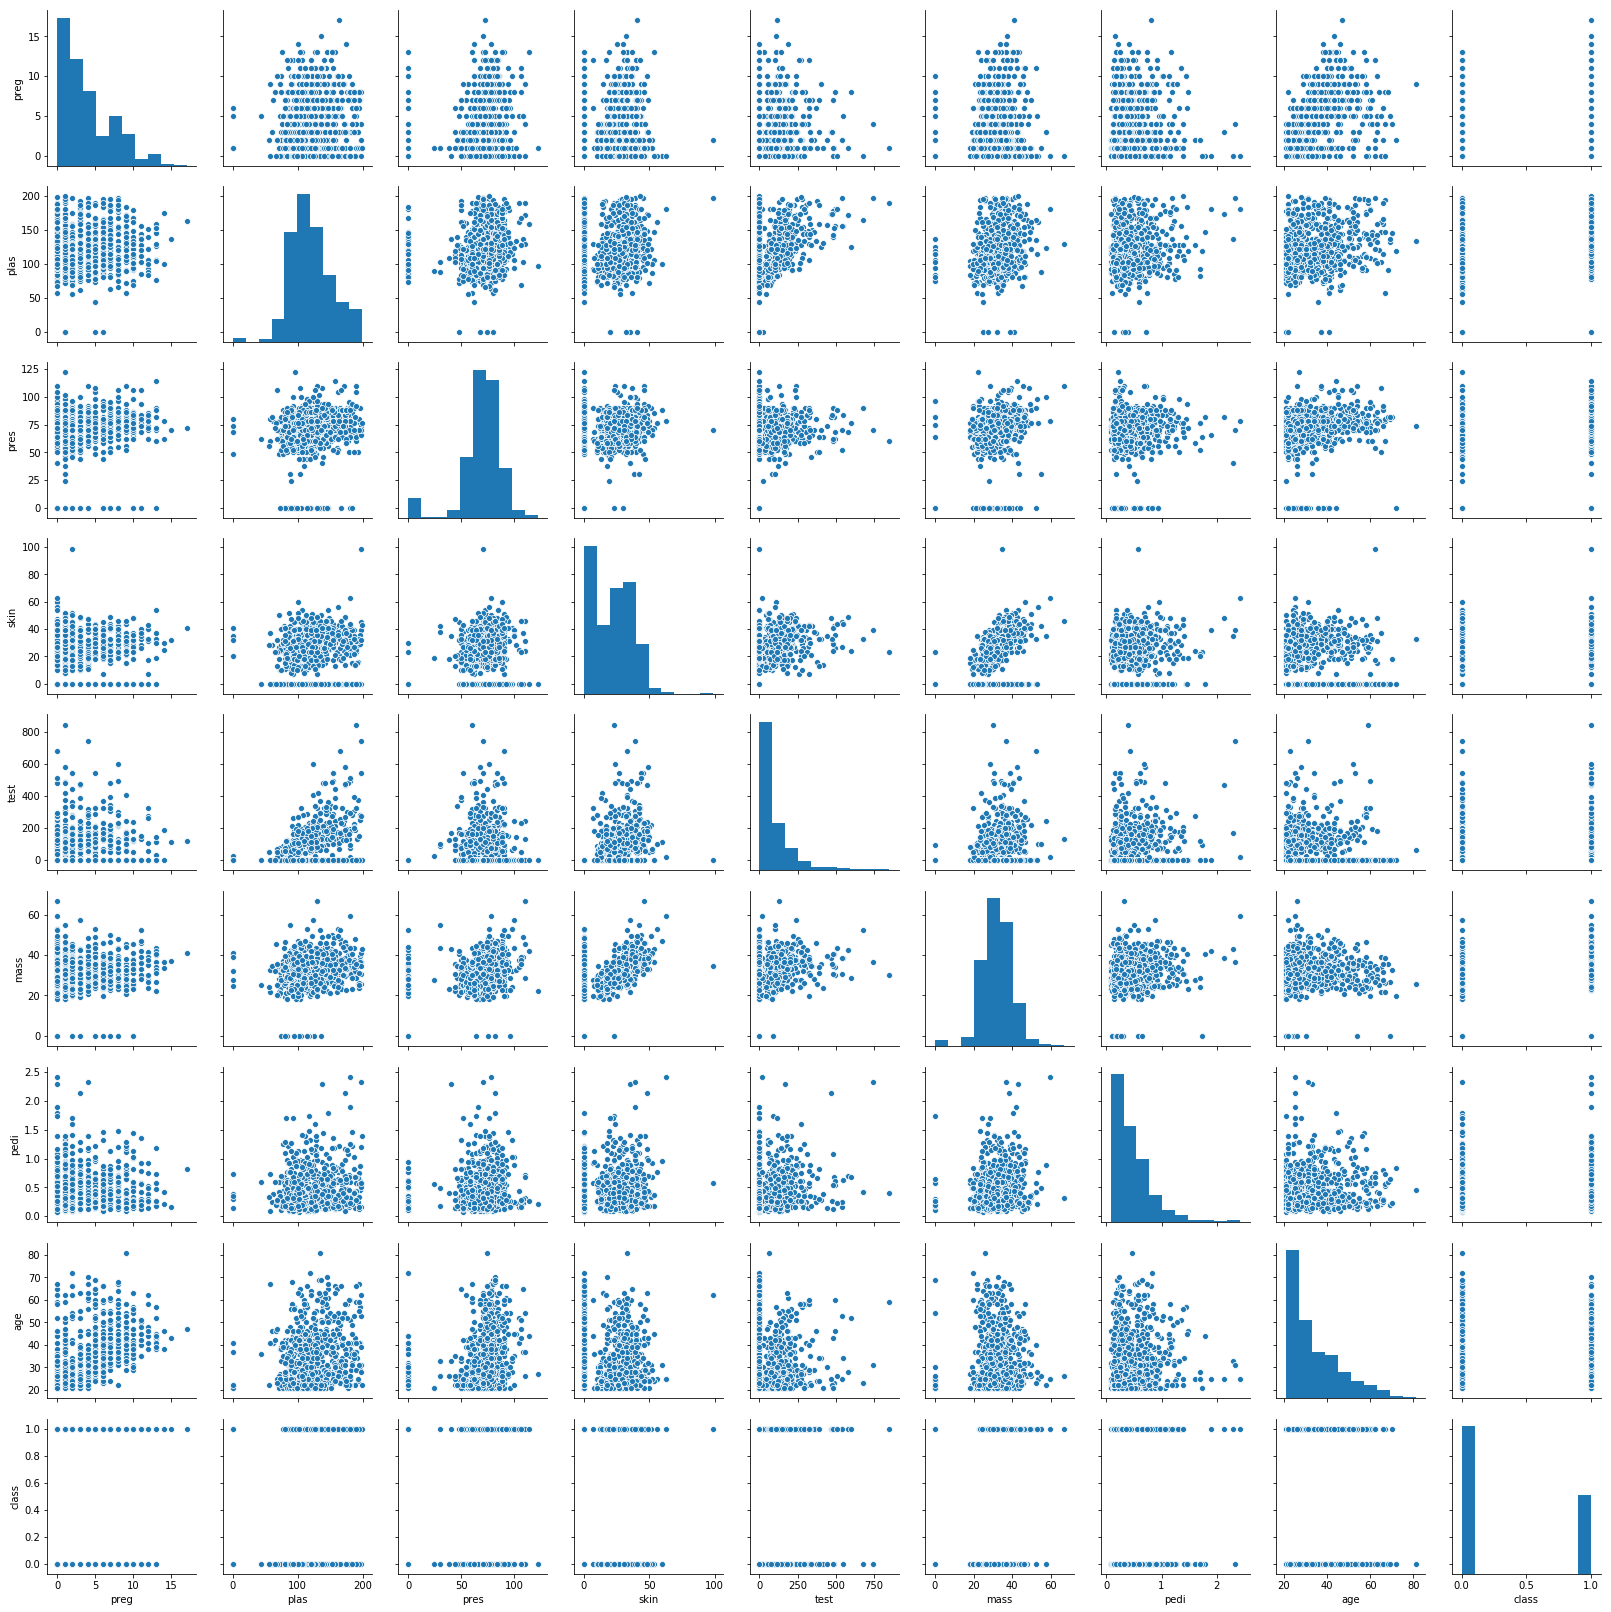

In [29]:
sns.pairplot(data)

# Ch7. Prepare Your Data For Machine Learning
## Min Max Scaler

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
filename = '../data/machine_learning_mastery/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)
array = data.values

# Seperate array into input and output components
X = array[:, 0:8]
Y = array[:, 8]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# Summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5, :])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardize Data

In [14]:
# Standardise data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

X = array[:, 0:8]
Y = array[:, 8]

scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalize Data

In [15]:
# Normalize data (length of 1)
from sklearn.preprocessing import Normalizer

X = array[:, 0:8]
Y = array[:, 8]

scaler = Normalizer()
normalizedX = scaler.fit_transform(X)

print(normalizedX[0:5, :])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


## Binarize Data

In [19]:
# Binarization
from sklearn.preprocessing import Binarizer

X = array[:, 0:8]
Y = array[:, 8]

binarizer = Binarizer(threshold=0.0)
binaryX = binarizer.fit_transform(X)

print(binaryX[0:5, :])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Ch8. Feature Selection For Machine Learning

1. Univariate Selection
2. Recursive Feature Elimination
3. Principle Component Analysis
4. Feature Importance

## 8.2 Univariate Selection

In [2]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Load data
filename = '../data/machine_learning_mastery/pima_indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:, 0:8]
Y = array[:,8]

# Feature Extraction
test = SelectKBest(score_func=chi2, k=4)


## Recursive Feature Elimination

In [27]:
# Feature Extraction wothj RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [28]:
from sklearn.svm import SVR

model2 = SVR(kernel="linear")
rfe2 = RFE(model2, 3)
fit2 = rfe.fit(X, Y)
print("Number of Features: %d" % fit2.n_features_)
print("Selected Features: %s" % fit2.support_)
print("Feature Ranking: %s" % fit2.ranking_)

Number of Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

## 8.4 Principal Component Analysis (PCA)

In [31]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

np.set_printoptions(precision=3)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


## 8.5 Feature Importance

In [34]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature Extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
np.set_printoptions(precision=5)
print(model.feature_importances_)

[0.10626 0.23928 0.09872 0.0807  0.07305 0.13021 0.12478 0.147  ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Ch.9 Evaluate the Performance of Machine Learning Algorithms with Resampling